<a href="https://colab.research.google.com/github/Rajat-Sri/Capstone-2-Rossmann-Sales-Prediction-Regression-Model/blob/main/Rossmann_Sales_Prediction_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Rossmann Sales Prediction Regression Model**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1** - Rajat Srivastava

# **Project Summary -**

answer here

# **GitHub Link -**

https://github.com/Rajat-Sri/Capstone-2-Rossmann-Sales-Prediction-Regression-Model

# **Problem Statement**


### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.


### The interest in a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely. Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. This project involves solving a real-world business problem of sales forecasting and building up a machine learning model for the same.

### We are provided with historical sales data for 1,115 Rossmann stores.Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing necessary libraries for analysing and visualizing the dataset

import pandas as pd #to perform data analysis
import numpy as np #to perform operations on arrays
import matplotlib.pyplot as plt #to visualize 2d plots and graphs
import seaborn as sns #to create better visualizations more advanced statistical plots

import warnings    
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Importing store and sales dataset from drive
store_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Capstone 2/retail sales prediction/store.csv')
sales_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Capstone 2/retail sales prediction/Rossmann Stores Data.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look

In [4]:
# store_df dataset first look

store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
# sales_df dataset first look
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Dataset Rows & Columns count

In [6]:
# Before counting rows and column we must merge the two datasets

# Merging both dataset and storing inside a dataframe

df = sales_df.merge(store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
# Dataset Rows & Columns count

df.shape

(1017209, 18)

In [8]:
# Creating a copy of dataframe 'df' which will be used while creating ML Model

ml_df = df.copy()

### Dataset Information

In [9]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

We can observe some basic information about dataset like total number of non null values in each column and data type of all the columns as well.

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count

df.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count

df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [12]:
store_df.isnull().mean()*100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

<Axes: >

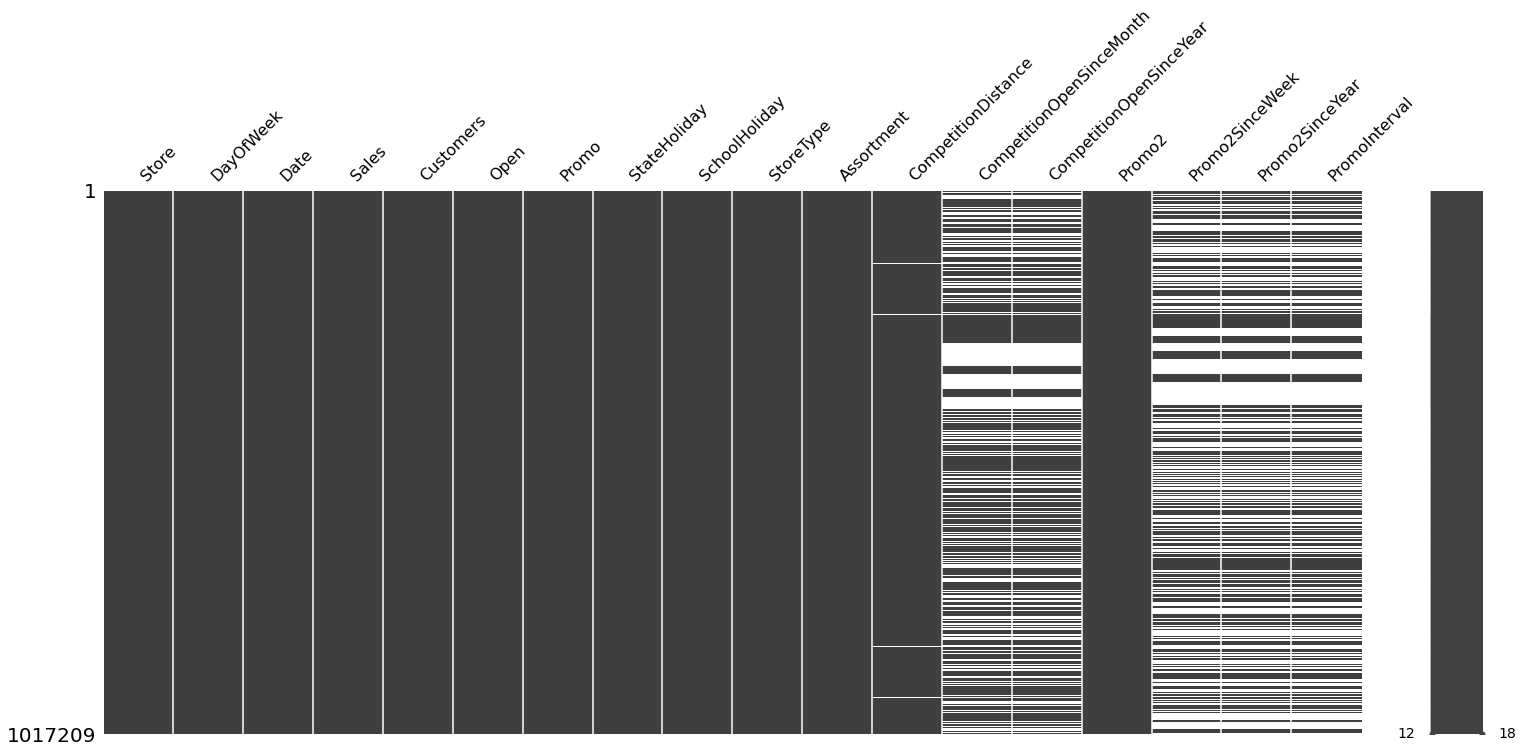

In [13]:
# Visualizing the missing values

import missingno as msno
msno.matrix(df)

### What did you know about your dataset?

1.   Merged dataset contains 1017209 rows and 18 columns.
2.   All columns are of Object,Integer or Float data types.
3.   There are lot of missing values in some columns which need to be handled moving forward.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns

df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [15]:
# Dataset Describe

df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description 

*  **Store** - a unique Id for each store
*  **Sales** - the turnover for any given day (Dependent Variable)
* **Customers** - the number of customers on a given day
* **Open** - store open or not: 0 = closed, 1 = open
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - differentiates between 4 different store models: a, b, c, d
* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
* **CompetitionDistance** - distance in meters to the nearest competitor store
* **CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.

#creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

#checking the unique values
for col in categorical_variables:
  print(f'Unique values for {col}: {df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.

Text(0.5, 0, 'Competition Distance Distribution Plot')

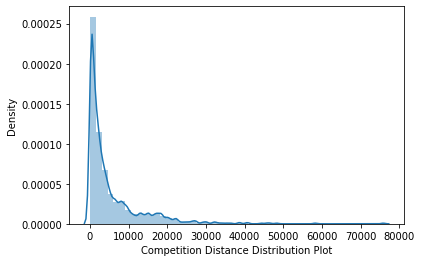

In [18]:
# distribution plot of competition distance
sns.distplot(x=df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

Observation

Compitition distance column data is clearly right skewed so it will be better to use median value to fill null values as it does not affect skewness.

In [19]:
# filling competition distance with the median value and checking the result

df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace = True)
df['CompetitionDistance'].isnull().sum()

0

In [20]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [21]:
# imputing the nan values of promo2 related columns with 0
df['Promo2SinceWeek'].fillna(value=0,inplace=True)
df['Promo2SinceYear'].fillna(value=0,inplace=True)
df['PromoInterval'].fillna(value=0,inplace=True)

In [22]:
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].astype(int)
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].astype(int)
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].astype(int)
df['Promo2SinceYear'] = df['Promo2SinceYear'].astype(int)

In [23]:
#change into int type

df['StateHoliday'].replace({'0':0}, inplace=True)

In [24]:
# Now checking Nan values
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [25]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,0,0,0


### What all manipulations have you done and insights you found?

**Manipulations**

*   Less than 1% data is missing in CompetitionDistance column, which is replaced with median as it will not affect data skewness.
*   More than 30% data is missing in CompetitionOpenSinceMonth and CompetitionOpenSinceYear columns which is replaced with mode values i.e. with most recurring values.
*  More than 40% data is missing from Promo2SinceWeek,Promo2SinceYear and PromoInterval columns which we have replaced with 0.
*  Changed data types of several columns from float to integer for better data representation.
*  Replaced object type '0' with integer type 0.

**Insight**

*  Sales of some stores can be seen 0 which indicates they are not in operations on those days either due to holidays or shops are under refurbishment.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

We will explore and see what factors are influencing Rossmann stores sales and how.

In [26]:
# Creating a copy of df before data vizualization

newdf = df.copy()

#### Chart - 1

   Year       Sales
0  2013  2302876084
1  2014  2180804896
2  2015  1389499643


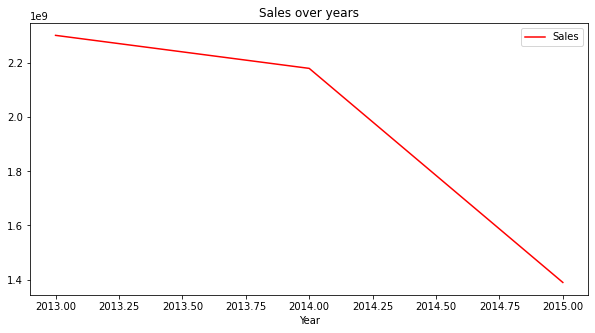

In [27]:
# Chart - 1 visualization code

#creating features from the date for better data visualization

newdf['Date'] = pd.to_datetime(newdf['Date']) # converting from object to datetime format
newdf['Year'] = newdf['Date'].dt.year #extracting and creating Year coulmn from Date
newdf['Month'] = newdf['Date'].dt.month #extracting and creating Year coulmn from Date
newdf['DayOfYear'] = newdf['Date'].dt.dayofyear #extracting and creating Year coulmn from Date

#Sales trends over years
sales_over_years = newdf.groupby(['Year'])['Sales'].sum().reset_index() # grouping by year
sales_over_years = sales_over_years.sort_values(by = ['Sales'], ascending = False) # soring data by sales in descending order
print(sales_over_years)

#Visualizing using line graph
newdf.groupby('Year')["Sales"].sum().plot.line(title='Sales over years',figsize=(10,5), legend=True,color='r') 
plt.show()

##### 1. Why did you pick the specific chart?

Line graphs works well to track changes over short and long periods of time.

##### 2. What is/are the insight(s) found from the chart?

There is a decline in sales year over year.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We observed declining trend of sales over years, we need to analyse data in depth to know the root cause of this negative growth.

#### Chart - 2

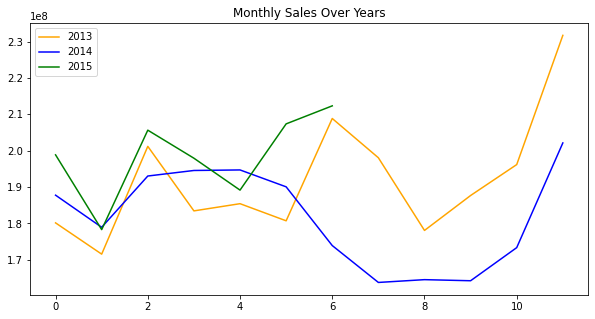

In [28]:
# Sales treands of each year seperately,for better understanding.

sales_2013 = newdf[newdf['Year']== 2013]
sales_2014 = newdf[newdf['Year']==2014]
sales_2015 = newdf[newdf['Year']== 2015]

#monthly sales for each year
sales_2013 = sales_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_2015.groupby('Month')['Sales'].sum().reset_index()

#Visualizing using line graph 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Line graphs works well to track changes over short and long periods of time.

##### 2. What is/are the insight(s) found from the chart?

From this chart few things are very clear - 
*  We have a given data of two and the half years. 
*  We have data of first 6 months only for the year 2015, which resulted in sudden decline of overall sales in previous line plot.
*   In 2014 from July to September we can notice near to 0 sales, this might be the time most shops were under refurbishment.
*   During November and December there is a sudden jump  in sales each year, this is because of festive seasons over those months and its a time before holidays like easter and christmas.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In previous chart we observed in sales drop over years.

From this chart we got some reasons for this negative growth - 

* We have data of first 6 months only for the year 2015, which resulted in sudden decline of overall sales in previous line plot.
* In 2014 from July to September we can notice near to 0 sales, this might be the time most shops were under refurbishment.And this resulted overall sales in nagative way.

#### Chart - 3

   DayOfWeek       Sales
0          1  1130203012
1          2  1020411930
4          5   980555941
2          3   954962863
3          4   911177709
5          6   846317735
6          7    29551433


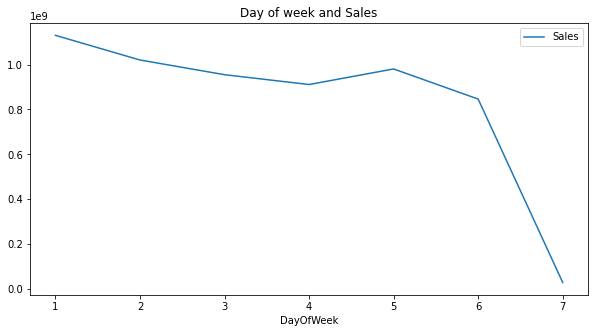

In [29]:
# Chart - 3 visualization code

# Sales over different days of a week

all_week_sales = newdf.groupby(['DayOfWeek'])['Sales'].sum().reset_index()
all_week_sales = all_week_sales.sort_values(by = ['Sales'], ascending = False).head(7)
print(all_week_sales)

# Visualizing using line graph
newdf.groupby("DayOfWeek")["Sales"].sum().plot.line(title='Day of week and Sales',figsize=(10,5), legend=True)
plt.show()

##### 1. Why did you pick the specific chart?

Line graphs works well to track changes over short and long periods of time.

##### 2. What is/are the insight(s) found from the chart?

**Observations**

*   There is a sudden drop in sales on Saturday and Sundays, probably because most of the shops remained closed on saturday specially on sunday, and that is why we can observe high sales on monday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Suddent jump in sales on Mondays shows that there is a product demand on sunday's as well, and as most shops remain closed on sunday's there is a area of improvemnet in sales growth here.

#### Chart - 4

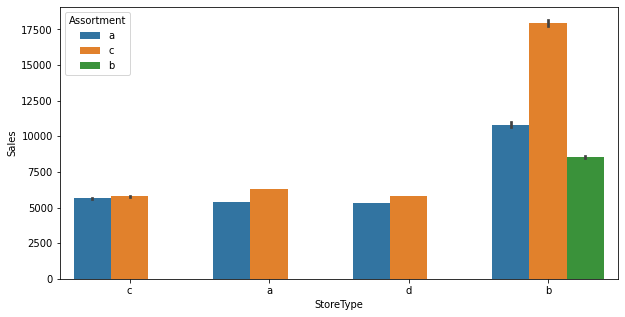

In [30]:
# Chart - 4 visualization code

#Let's check the relationship between store type, assortment levels and sales
#Visualizing using bar graph

plt.figure(figsize=(10,5))
sns.barplot(x=newdf["StoreType"],y=newdf['Sales'],hue=newdf["Assortment"])
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

**Observations**

*   Only Type B store type have all the 3 kinds of product assortments, which is definitely helping customers to find products they need and as a result we can clearly see highest average sales for Type B stores

*Note - This bar plot only tells that sales per store for Type B stores is higher. It did not tell about overall sales.So lets analyse further for more insights.*

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Here we got to know that more assortment levels gives a lot of options and accessibility to customers to choose products according to their needs.And this insight can be used in correct ways for creating a positive impact on business.

#### Chart - 5

  StoreType      Store
0         a  308955088
1         b    8897182
2         c   83229564
3         d  166957910


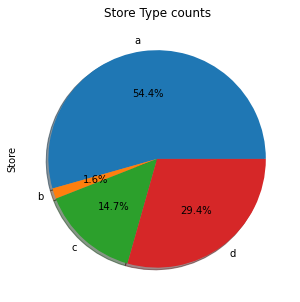

In [31]:
# Chart - 5 visualization code

#Count of each store type
store_type_store_count = newdf.groupby(['StoreType'])['Store'].sum().reset_index()
print(store_type_store_count)

#Visualizing using pie chart
newdf.groupby("StoreType")["Store"].sum().plot.pie(title='Store Type counts', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

**Observations**

*   Around 55% of stores are of Type A, and least number of stores are of Type B.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From previous graph we saw that type B store types with 3 assortment levels we doing good sales.

But from this graph it is evident that though we are getting good sales from these store types even then also count of Type B store types in very less in numbers.

May be initial cost of establishing such stores might be cost ineffective.Moving forward we will try to find reason for this as well.

#### Chart - 6

  StoreType  Customers
0         a  363541434
3         d  156904995
2         c   92129705
1         b   31465621


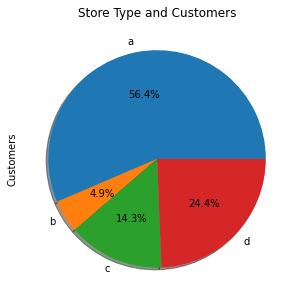

In [32]:
# Chart - 6 visualization code

# Total Customer counts for each store types
store_type_customers = newdf.groupby(['StoreType'])['Customers'].sum().reset_index()
store_type_customers = store_type_customers.sort_values(by = ['Customers'], ascending = False).head()
print(store_type_customers)

#Visualizing using pie chart
newdf.groupby("StoreType")["Customers"].sum().plot.pie(title='Store Type and Customers',figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

**Observations**

*   Type A stores have highest number of customers, and Type B has the least.This is quite evident as most stores are of Type A and Type B has least amount of stores.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Though overall customer count for type B stores in the lowest because of least count of stores, but on other hand, count of store to count of customers ratio is relatively higher here.

#### Chart - 7

  StoreType       Sales
0         a  3165334859
3         d  1765392943
2         c   783221426
1         b   159231395


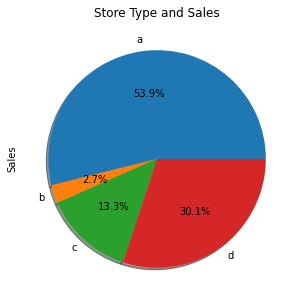

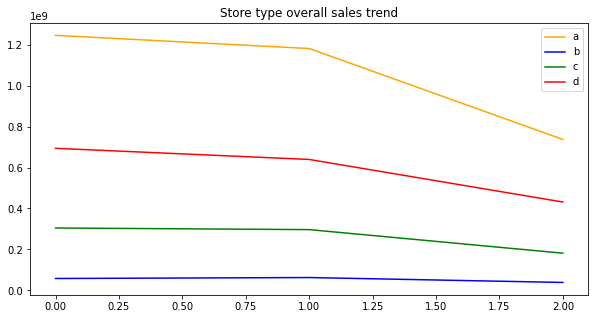

In [33]:
# Chart - 7 visualization code

#Total sales of each store type over the years
store_type_sales = newdf.groupby(['StoreType'])['Sales'].sum().reset_index()
store_type_sales = store_type_sales.sort_values(by = ['Sales'], ascending = False).head()
print(store_type_sales)

#Visualizing using pie chart
newdf.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales',figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

# Overall Sales treands for different store types seperately,for better understanding.

store_a = newdf[newdf['StoreType']== 'a']
store_b = newdf[newdf['StoreType']=='b']
store_c = newdf[newdf['StoreType']== 'c']
store_d = newdf[newdf['StoreType']== 'd']

store_a = store_a.groupby('Year')['Sales'].sum().reset_index()
store_b = store_b.groupby('Year')['Sales'].sum().reset_index()
store_c = store_c.groupby('Year')['Sales'].sum().reset_index()
store_d = store_d.groupby('Year')['Sales'].sum().reset_index()

# Visualizing using line graph
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(store_a.loc[:,'Sales'],label='a',color='orange')
plt.plot(store_b.loc[:,'Sales'],label='b',color='blue')
plt.plot(store_c.loc[:,'Sales'],label='c',color='green')
plt.plot(store_d.loc[:,'Sales'],label='d',color='red')
plt.title('Store type overall sales trend')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

* We used pie chart as it helps to organize and show data as a percentage of a whole, and best suited to represent such data.
* We also used Line graphs as it works well to track changes over short and long periods of time.

##### 2. What is/are the insight(s) found from the chart?

**Observations**

*   As expected, sales of Type A stores is maximum clearly beacause of their huge market share of more than 50%,but there is a declining trend as well in sales of all store types.

* It is also noticable that most sharp fall in sales for Store Type A.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Reason for overall fall in sales is already discussed in Graph 2 in detail.

But reason for sharp fall in sales of type A store might be because most shops went under refurbishment belong to this category as it has the highest overall count of stores.

There might be other reasons which we will try to dig in upcoming analysis.

#### Chart - 8

  Assortment  Customers
0          a  332766938
2          c  294302292
1          b   16972525


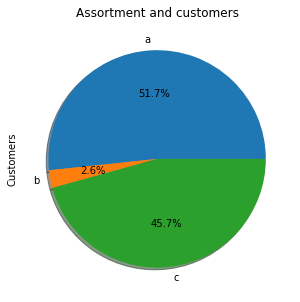

In [34]:
# Chart - 8 visualization code

# Customers preferance over different types of assortments

Assortment_customers = newdf.groupby(['Assortment'])['Customers'].sum().reset_index()
Assortment_customers = Assortment_customers.sort_values(by = ['Customers'], ascending = False).head()
print(Assortment_customers)

#Visualizing
newdf.groupby("Assortment")["Customers"].sum().plot.pie(title='Assortment and customers', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

We used pie chart as it helps to organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

**Observations**

*   Most customers like only basic or extended levels of assortments.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this graph we can clearly observe that brand has used assortment of type b are very few places, we will try to find reason for this as well.

#### Chart - 9

  Assortment       Sales
0          a  2945750070
2          c  2856484241
1          b    70946312


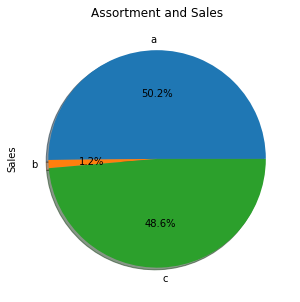

In [35]:
# Chart - 9 visualization code

# Sales of different types of assortments
Assortment_sales = newdf.groupby(['Assortment'])['Sales'].sum().reset_index()
Assortment_sales = Assortment_sales.sort_values(by = ['Sales'], ascending = False).head()
print(Assortment_sales)

#Visualizing
newdf.groupby("Assortment")["Sales"].sum().plot.pie(title='Assortment and Sales', figsize=(10,5), autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

We used pie chart as it helps to organize and show data as a percentage of a whole, and best suited to represent such data.

##### 2. What is/are the insight(s) found from the chart?

**Observations**

*  A and C assorments generate most of the sales as they are mostly preferred by the customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the sales over these assortment types it is very clear that customers didn't show much interest in assortment type B as a result of which brand has not used much of those, which positively impaced the business.

#### Chart - 10

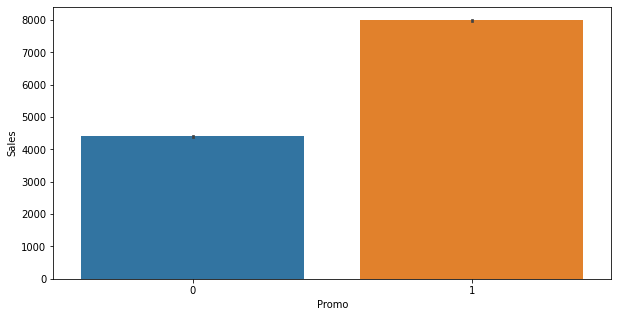

In [36]:
# Chart - 10 visualization code

# Affect of promo over sales

plt.figure(figsize=(10,5))
sns.barplot(x=newdf["Promo"],y=newdf['Sales'])
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

**Observations**

*   Stores using product promotions really helped them by boosting sales by about two times.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A positive impact of using promotions can be observed here.But higher use of promotions can have their negative impacts too, as product marketing is a very costly affair in a business.

#### Chart - 11

   Promo  Promo2       Sales
0      0       0  1482612096
1      0       1  1289362241
2      1       0  1628930532
3      1       1  1472275754


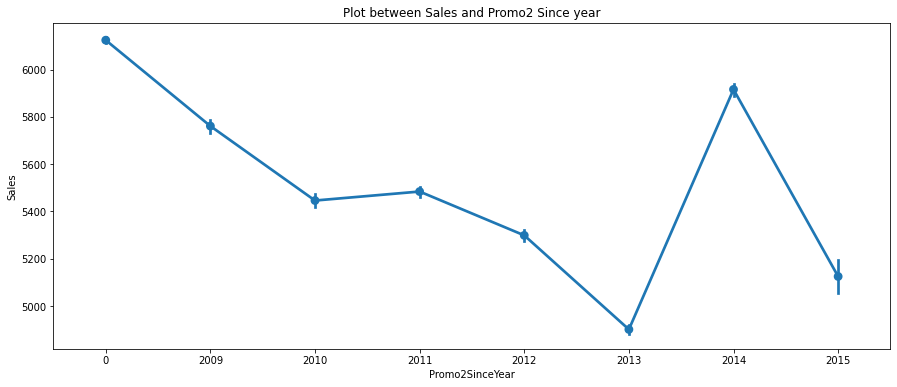

In [37]:
# Chart - 11 visualization code

# Affect of extended promotions over overall sales

promo2_sales = newdf.groupby(['Promo','Promo2'])['Sales'].sum().reset_index()
print(promo2_sales)

plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=newdf)
plt.title('Plot between Sales and Promo2 Since year')
plt.show()

##### 1. Why did you pick the specific chart?

We used Line graphs as it works well to track changes over short and long periods of time.

##### 2. What is/are the insight(s) found from the chart?

**Observations**

Promo = Promotions , Promo2 = Extended Promotions

*   Promotions really helped in boosting sales trends, but extended promotions had negatively impacted the overall sales of the stores

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Though promotion really helped in sales growth, but as I feared , extended promotions negatively impacted the sales.

Reason can be many like cost ineffectiveness or non inclination of promotion towards customers requirements.

#### Chart - 12

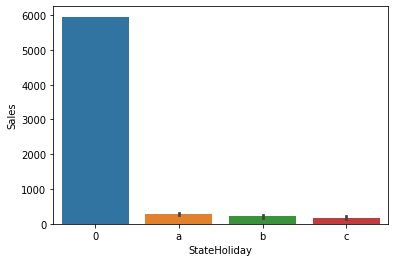

In [38]:
# Chart - 12 visualization code

# Sales during state holidays

sns.barplot(x="StateHoliday", y="Sales", data=newdf)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

**Observations**

a = public holiday, b = Easter holiday, c = Christmas, 0 = None

*   Low volume of sales clearly indicates that most of the stores are closed during state holoidays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most people are at home or on vocation during holidays, people might be willing to reach stores on those days as well. Though there is an opportunity here by opening stores on those days, but business need to evaluate the impact on employees as well, and take decision accordingly.

#### Chart - 13

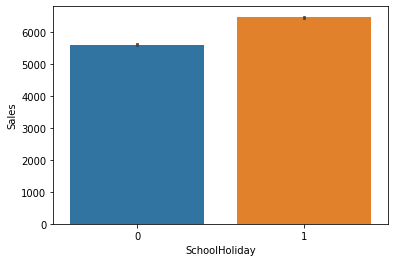

In [39]:
# Chart - 13 visualization code

# Sales during school holidays

schoolholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=newdf)

##### 1. Why did you pick the specific chart?

Bar charts are one of beat ways to show segments of information. Vertical/Horizontal bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

**Observations**

*   Stores during school holidays got more sales comared to days when schools were opened, probabily because childeren might be shopping with parents which resulted in impulsive buy.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It quite evident that holidays definitely have a positive affect on overall sales.

#### Chart - 14 - Correlation Heatmap

<Axes: >

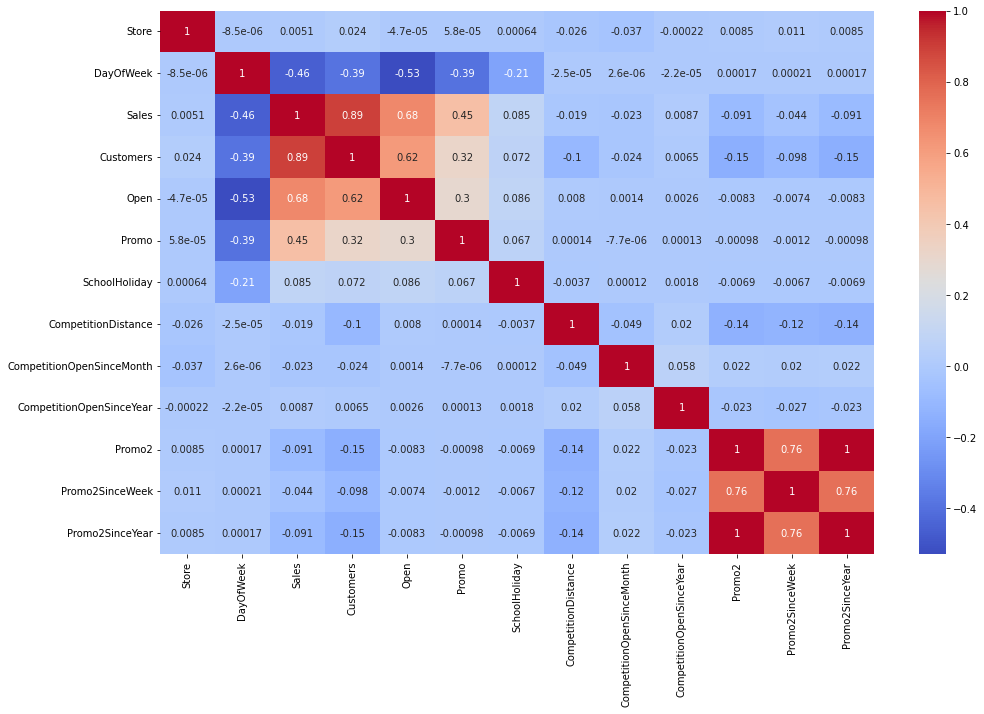

In [40]:
# Correlation Heatmap visualization code

#Chaecking for multicollinearity between independent features using correlation heatmap

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?

Correlation heatmaps is used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots helps to identify outliers and to detect linear and nonlinear relationships as well.

##### 2. What is/are the insight(s) found from the chart?

####Observation:
* Day of the week has a negative correlation with Sales, indicating low sales as the weekends.
* Promo, customers and open has positive correlation with sales.
* State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
* CompetitionDistance showing negative correlation with sales, suggests that as the distance increases sales reduce.
* There's multicollinearity involved in the dataset as well.

#### Chart - 15 - Pair Plot 

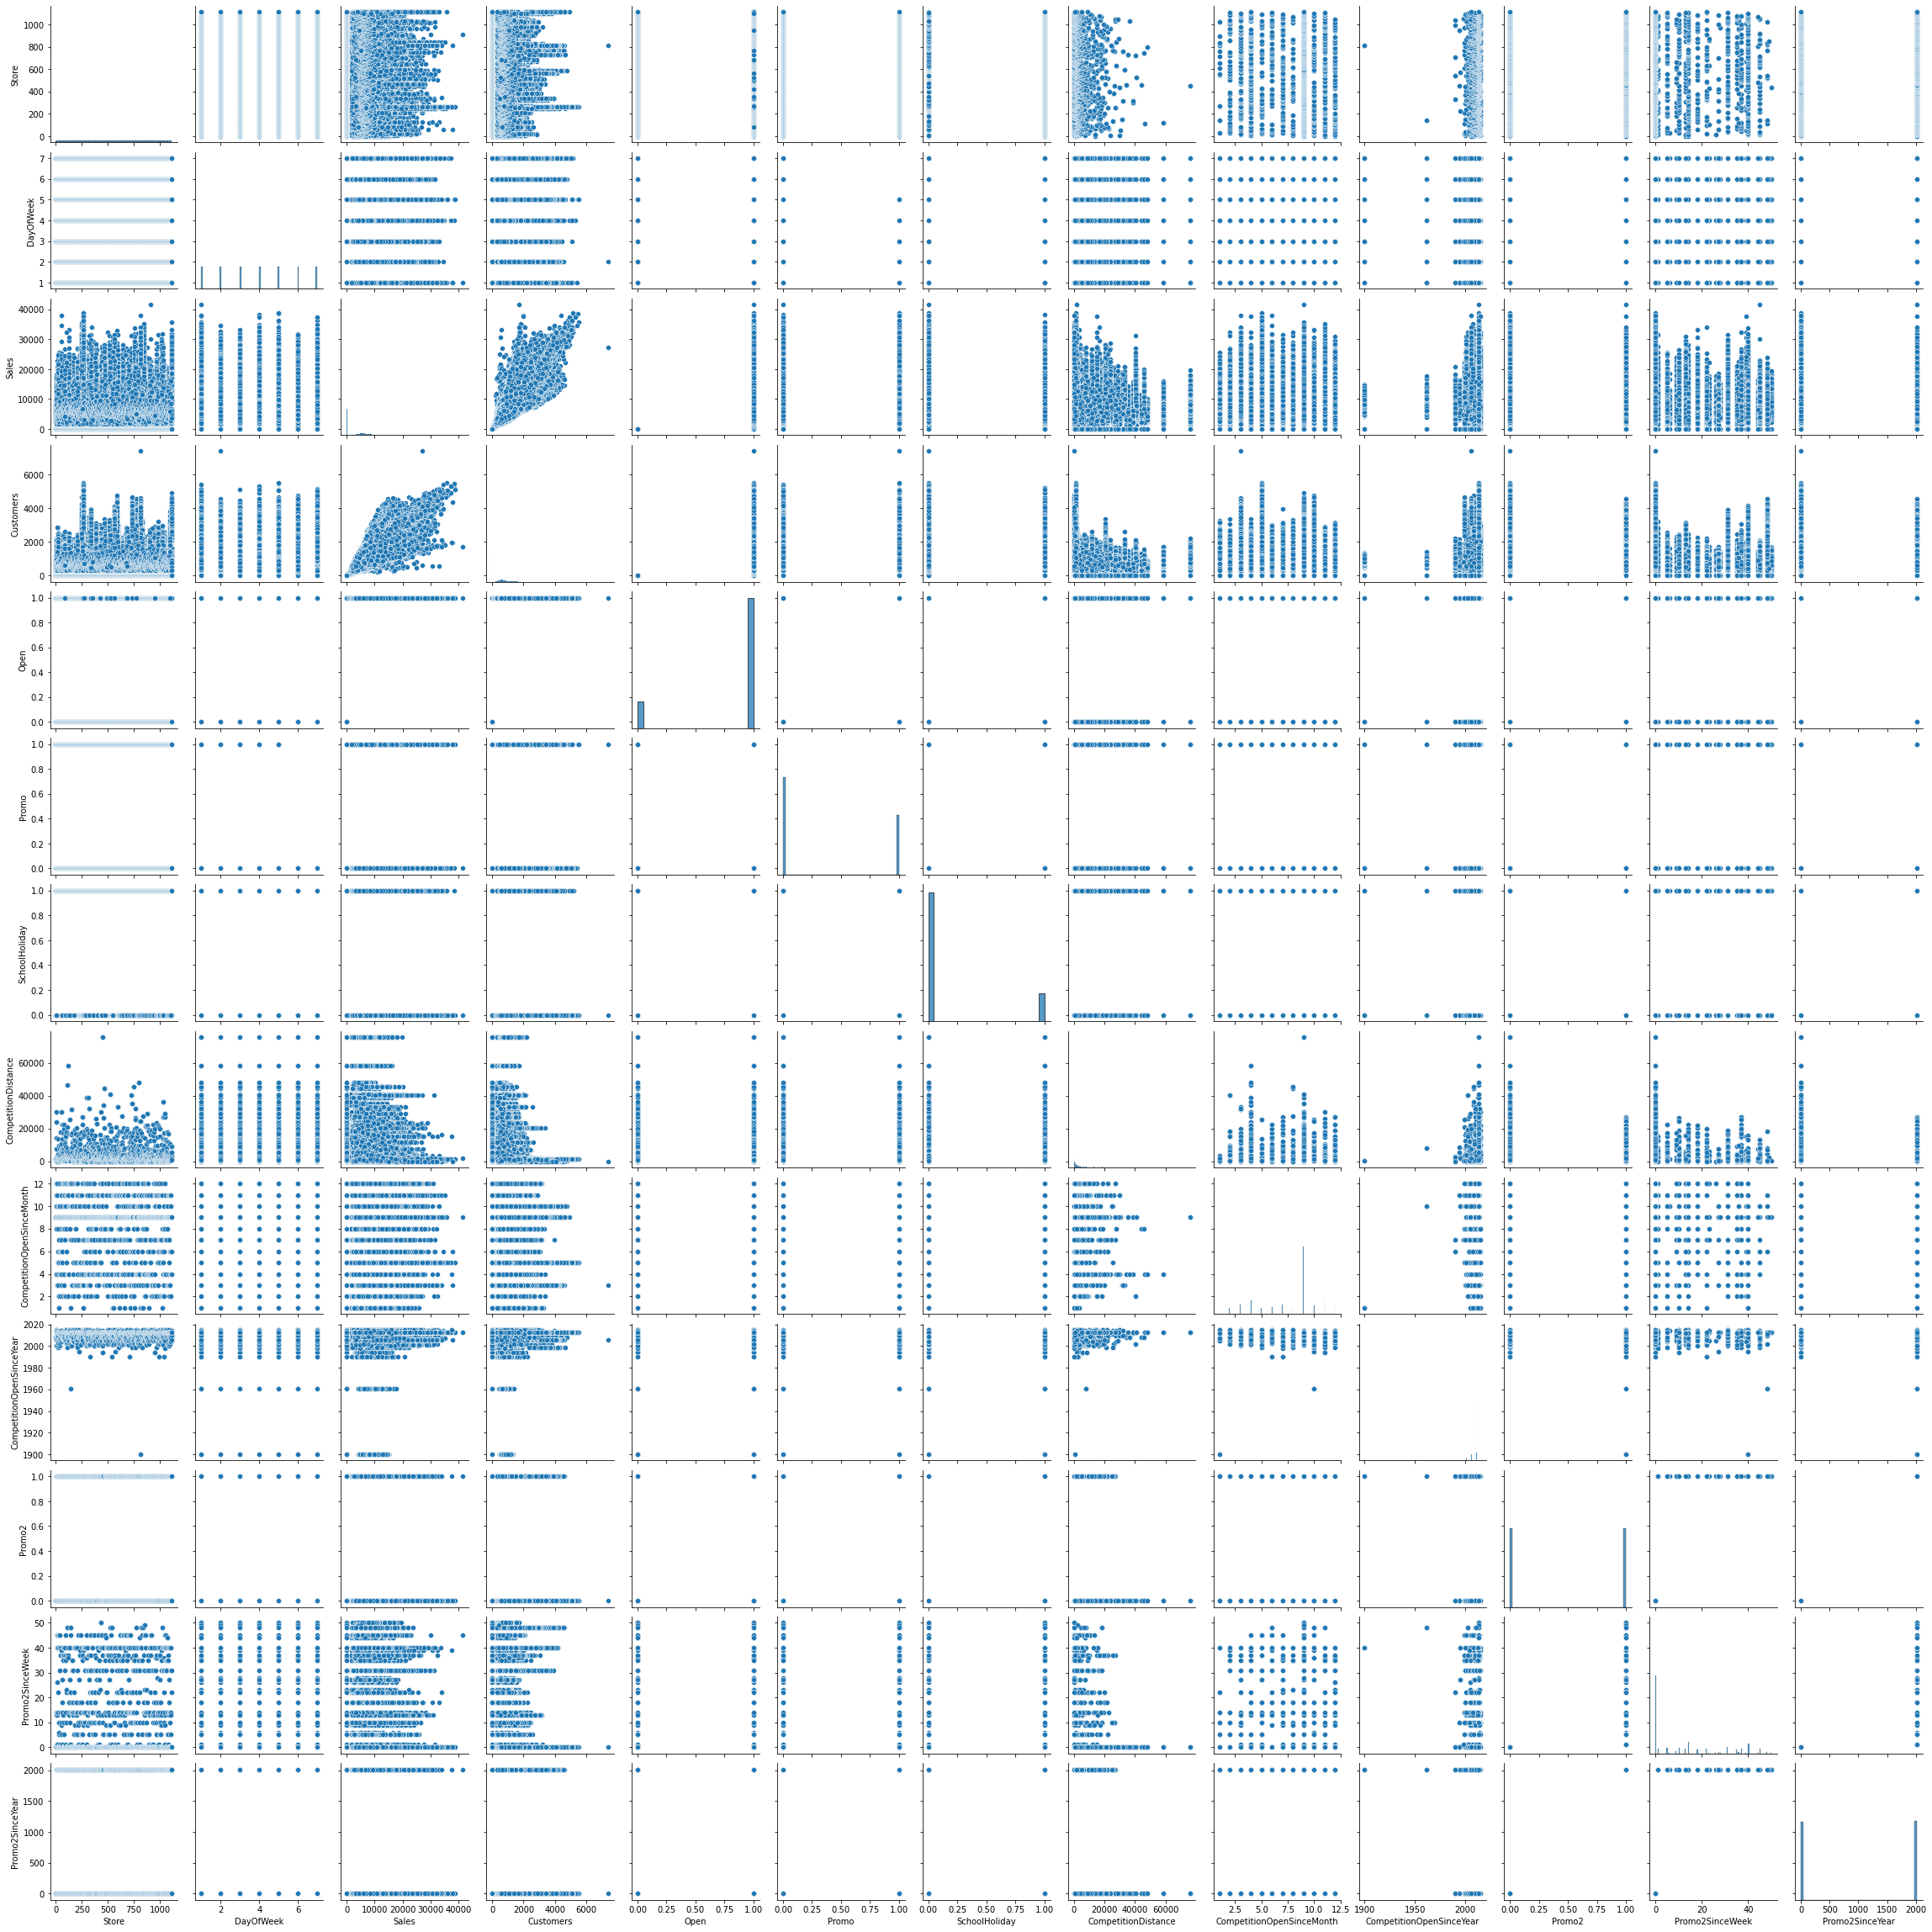

In [41]:
# Pair Plot visualization code

sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it.

##### 2. What is/are the insight(s) found from the chart?

####Observation:
* From sactter plot between CompetitionDistance and sales, showing negative correlation suggests that as the distance increases sales reduce.
* Highly correlated features showing multicollinearity are - a.**open and customers**   b.**promo2 with promo2sinceweek and promo2sinceyear**
* Before data modelling its better to remove features like open,promo2sinceweek and promo2sinceyear to remove multicollinarity among independent features.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypotheses**

Just by observing the head of the dataset and understanding the features involved in it,  the following hypotheses could be framed:

* There's a feature called "DayOfWeek" with the values 1-7 denoting each day of the week. There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.
* Customers would have a positive correlation with Sales.
* The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.
* Promotion should be having a positive correlation with Sales.
* Some stores were closed due to refurbishment, those would generate 0 revenue for that time period.
* Stores are influenced by seasonality, probably before holidays sales would be high.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null hypothesis (H0): Data follows a normal distribution.
- Alternate Hypothesis (H1): Data does not follow a normal distribution.

#### 2. Perform an appropriate statistical test.

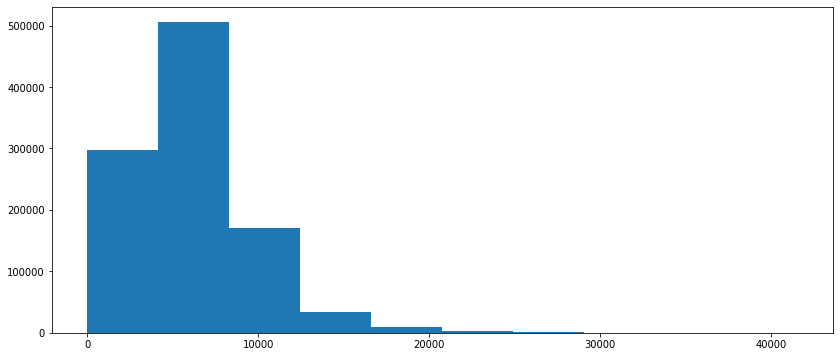

In [27]:
#Cheking Histogram
import matplotlib
from matplotlib import pyplot 
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(df['Sales'])
pyplot.show()

In [28]:
# Perform Statistical Test to obtain P-Value
#Help from Python
from scipy.stats import shapiro #importing shapiro library

DataToTest = df['Sales']

stat, p = shapiro(DataToTest) #applying

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.94, p=0.000000000000000000000000000000
Not a normal distribution


##### Which statistical test have you done to obtain P-Value?

Shapiro-Wilk Test

##### Why did you choose the specific statistical test?

It is preferable that normality be assessed both visually and through normality tests, of which the Shapiro-Wilk test is highly recommended.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null hypothesis (H0): Continous Data is highly correlated
- Alternate Hypothesis (H1): Continous Data not correlated

#### 2. Perform an appropriate statistical test.

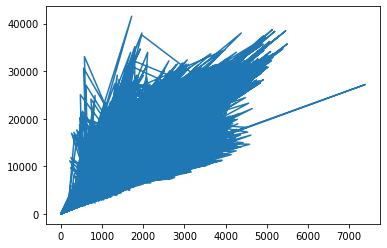

In [29]:
FirstSample = df['Customers']
SecondSample = df['Sales']

pyplot.plot(FirstSample,SecondSample)
pyplot.show()

In [30]:
# Perform Statistical Test to obtain P-Value
#Spearman Rank Correlation
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.903, p=0.000000
dependent samples


##### Which statistical test have you done to obtain P-Value?

Spearman Rank Correlation

##### Why did you choose the specific statistical test?

Spearman's rank correlation measures the strength and direction of association between two ranked variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null hypothesis (H0): Categorical Data is highly correlated
- Alternate Hypothesis (H1): Categorical Data not correlated

#### 2. Perform an appropriate statistical test.

In [31]:
contingency_data = pd.crosstab(df['StoreType'], df['Assortment'],margins = False)
contingency_data

Assortment,a,b,c
StoreType,,,
a,346389,0,205238
b,6594,8294,942
c,70878,0,65962
d,113584,0,199328


In [32]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=587567.950, p=0.000
dependent categories


##### Which statistical test have you done to obtain P-Value?

Chi square test

##### Why did you choose the specific statistical test?

Chi-square test is used to check independence of two categorical variables. It allows you to test whether the two variables are related to each other

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation

In [46]:
# Percentage of null values in ml_df
ml_df.isnull().mean()*100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
dtype: float64

In [47]:
# filling competition distance with the median value
ml_df['CompetitionDistance'].fillna(ml_df['CompetitionDistance'].median(), inplace = True)


In [48]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
ml_df['CompetitionOpenSinceMonth'].fillna(ml_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
ml_df['CompetitionOpenSinceYear'].fillna(ml_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [49]:
# dropping variables having  around 50% missing data in them

ml_df.drop('Promo2SinceWeek', inplace=True, axis=1)
ml_df.drop('Promo2SinceYear', inplace=True, axis=1)
ml_df.drop('PromoInterval', inplace=True, axis=1)

In [50]:
# Check Unique Values for each variable.

#creating a categorical column list 
categorical_variables = ['DayOfWeek','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','Promo2','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']

#checking the unique values
for col in categorical_variables:
  print(f'Unique values for {col}: {ml_df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for Promo2: [0 1]
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]


In [51]:
# Replacing 0 with d, there converting category from  0 to d 

ml_df['StateHoliday'].replace({0:'0'}, inplace=True)
ml_df['StateHoliday'].replace({'0':'d'}, inplace=True)

In [52]:
# converting float to int
ml_df['CompetitionOpenSinceMonth'] = ml_df['CompetitionOpenSinceMonth'].astype(int)
ml_df['CompetitionOpenSinceYear'] = ml_df['CompetitionOpenSinceYear'].astype(int)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Techniques used are as follows-


*   **Imputation Using (Mean/Median) Values:**Compitition distance column has around 5% missing data and data is clearly right skewed so we used median value to fill null values as it does not affect data skewnessas well.
*    **Imputation Using most frequent Values:**Missing values in Competition open since month and year are imputed with the most occuring values of the columns i.e modes of those columns as about 40% of data was missing.
*  **Dropping Variables:**Removed the columns Promo2SinceWeek,Promo2SinceYear,PromoInterval as around 50% data is missing in these column, we dropped the variable because we don't have enough information to ascertain anything useful from it.

### 2. Feature Manipulation and Selection

#### 1. Feature Manipulation

In [53]:
#creating features from the date

# converting from object to datetime format
ml_df['Date'] = pd.to_datetime(ml_df['Date'])

#extracting and creating Year,Month and DayOfYear coulmns from Date
ml_df['Year'] = ml_df['Date'].dt.year
ml_df['Month'] = ml_df['Date'].dt.month 
ml_df['DayOfYear'] = ml_df['Date'].dt.dayofyear

In [54]:
#combining competition open since month and competition open since year into total months
ml_df['CompetitionOpen'] = (ml_df['Year'] - ml_df['CompetitionOpenSinceYear'])*12 + (ml_df['Month'] - ml_df['CompetitionOpenSinceMonth'])
#correcting the neg values
ml_df['CompetitionOpen'] = ml_df['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
ml_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [55]:
#setting date and store as index
ml_df.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
ml_df.sort_index(inplace=True)

#### 2. Feature Selection

<Axes: >

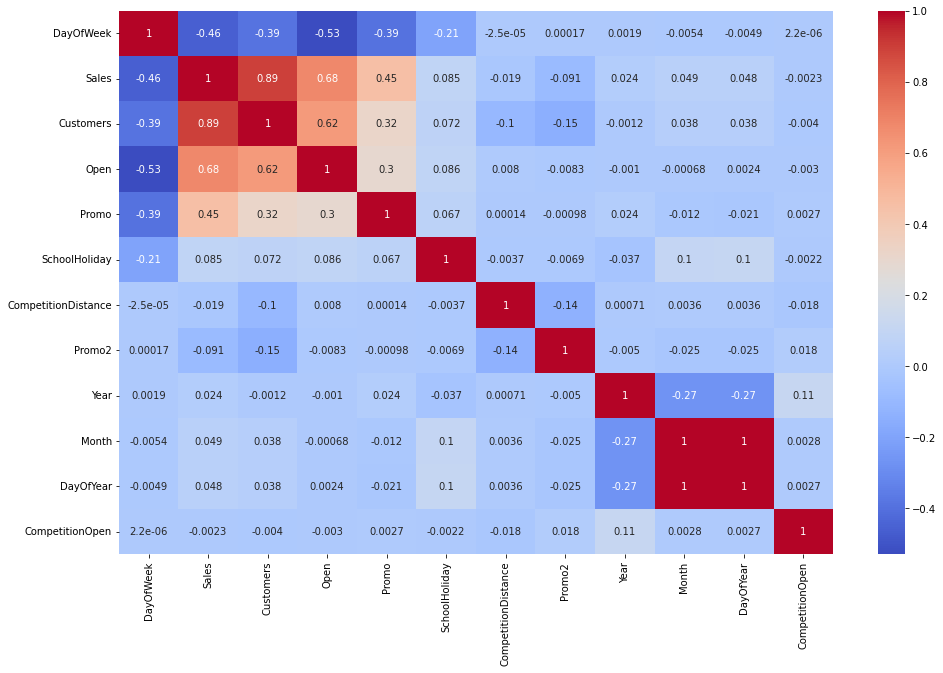

In [56]:
plt.figure(figsize=(16,10))
sns.heatmap(ml_df.corr(), cmap="coolwarm", annot=True)

In [57]:
# we won't need Month column as it is highly correlated with other independent variables
ml_df.drop('Month',axis=1,inplace=True)

##### What all feature selection methods have you used  and why?

* We are using **Correlation Coefficient method** for feature selection.

* Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

##### Which all feature you found important and why?

From correlation heatmap we can observe that - 
* Most important independent features are Customers,Open and Promo and they are highly correlated to dependent variable i.e. Sales
* Dependent features Month and DayOfYear are highly correlated to each other, thus it's better to remove one of them(so we removed Month column)
* Dependent feature Open is also highly correlated to Customers and is somewhere correlated to Promo as well.But we are not removing this feature for now as we need to remove the outliers before doing so.
* Dependent feature Promo is also somewhere correlated to Customers, but that correlation is not that high that we need to remove it.

### 3. Handling Outliers

<Axes: ylabel='Density'>

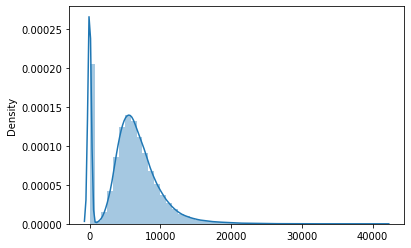

In [58]:
# distribution plot of Sales, as expected  a bit positively/right skewed and a lot of sales data is 0
sns.distplot(x=ml_df['Sales'])

In [59]:
#no of observations for closed stores with 0 sales
(ml_df[ml_df.Open == 0]).shape

(172817, 14)

In [60]:
#since the stores closed had 0 sale value; removing the irrelevant part
ml_df = ml_df[ml_df.Open != 0]
ml_df.drop('Open', axis=1, inplace=True)

It is mentioned in the problem statement that some stores were temporarily closed for refurbishment and hence did not generate any sales,this can affect our model so for now its better to remove such values from dataset.

Total number of Outliers present in the Sales column are 13437.


[Text(0.5, 1.0, 'Outliers Distribution')]

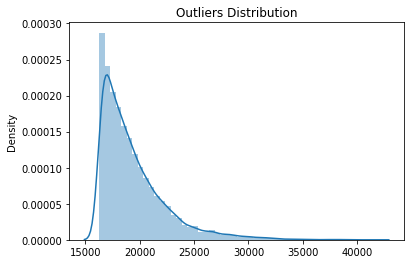

In [61]:
# seperating outliers using z-square 
mean_sales = np.mean(ml_df['Sales']) #mean
sd_sales = np.std(ml_df['Sales'])   #standard deviation

# More than 3 standard deviation is an outlier
threshold = 3

#code to identify outliers
outliers = []
for value in ml_df['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)

#total no of outliers     
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')

#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')

In [62]:
#percentage of sales greater than 30000
sales_outliers = ml_df.loc[ml_df['Sales']> 30000]
percentage_of_outliers = (len(sales_outliers)/len(ml_df))*100

#print
print(f'The percentage of observations of sales greater than 30000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 30000 are 0.018119546371827302


In [63]:
#exploring the reasons behind this behaviour
sales_outliers

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,DayOfYear,CompetitionOpen
Date,Store,,,,,,,,,,,,,
2013-01-07,817,1,32263,4065,1,d,0,a,a,140.0,0,2013,7,82
2013-01-21,817,1,30667,3900,1,d,0,a,a,140.0,0,2013,21,82
2013-02-04,817,1,31649,4067,1,d,1,a,a,140.0,0,2013,35,83
2013-02-15,560,5,30143,2651,0,d,0,c,c,1910.0,0,2013,46,0
2013-02-16,560,6,31448,3096,0,d,0,c,c,1910.0,0,2013,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-23,909,2,30038,1635,0,d,0,a,c,1680.0,1,2015,174,21
2015-07-05,262,7,30255,4762,0,d,0,b,a,1180.0,0,2015,186,26
2015-07-12,262,7,32271,4623,0,d,0,b,a,1180.0,0,2015,193,26


It is found on exploring the outliers that most of high sales are for such shops which are open on all 7 days of the week.

In [64]:
#lets see which stores were open on Sunday in the outliers dataframe
#store 262

sales_outliers.loc[sales_outliers['DayOfWeek']==7]

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,DayOfYear,CompetitionOpen
Date,Store,,,,,,,,,,,,,
2013-05-19,262,7,33357,5024,0,d,0,b,a,1180.0,0,2013,139,0
2013-06-02,262,7,30064,4533,0,d,0,b,a,1180.0,0,2013,153,1
2013-06-30,262,7,31810,4596,0,d,0,b,a,1180.0,0,2013,181,1
2013-07-14,262,7,30112,4560,0,d,0,b,a,1180.0,0,2013,195,2
2013-08-04,262,7,32252,5112,0,d,0,b,a,1180.0,0,2013,216,3
2013-09-01,262,7,32926,5145,0,d,0,b,a,1180.0,0,2013,244,4
2013-12-01,262,7,34904,4894,0,d,0,b,a,1180.0,0,2013,335,7
2013-12-08,262,7,31393,4630,0,d,0,b,a,1180.0,0,2013,342,7
2013-12-15,262,7,32058,4609,0,d,0,b,a,1180.0,0,2013,349,7


##### What all outlier treatment techniques have you used and why did you use those techniques?

* We used **Z score to detect outliers** :
 
 If the z score of a data point is more than 3 stabdard deviation, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

* We used **Trimming to remove outliers** :
 
 * A lot of sales values are near 0 because it is mentioned in the problem statement itself that some stores were temporarily closed for refurbishment and hence did not generate any sales,this can affect our model so for now its better to remove such values from dataset by trimming rows having sales 0.
 *After finding Z score we found high sales outliers, which were also trimmed.

In [65]:
ml_df.head()

DayOfWeek  Sales  Customers  Promo StateHoliday  \
Date       Store                                                    
2013-01-01 85             2   4220        619      0            a   
           259            2   6851       1444      0            a   
           262            2  17267       2875      0            a   
           274            2   3102        729      0            a   
           335            2   2401        482      0            a   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   

                  Promo2  Year  DayOfYear  CompetitionOpen  
Date       Store                                            
2013-01-01 85          0  2013          1               15  
           259         0  2013          1                0  
           262         0  2013          1                0  
           274         1  2013          1                0  
           335         1  2013          1                0

In [66]:
#Sales should be the last col

columns=list(ml_df.columns)
columns.remove('Sales')
columns.append('Sales')
ml_df=ml_df[columns]

In [67]:
# #creating a csv file for the comparison dataframe
# cleaned_data = ml_df.to_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Capstone 2/retail sales prediction/cleaned_data.csv')

### 4. Data Transformation

<Axes: ylabel='Density'>

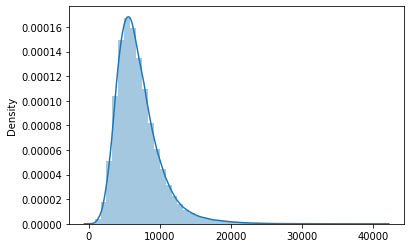

In [68]:
#distribution plot of Sales, as expected  a bit positively skewed
sns.distplot(x=ml_df['Sales'])

In [69]:
# ## transformation
ml_df['Sales'] = np.log(ml_df['Sales'])
ml_df.drop(ml_df[ml_df['Sales'] == float("-inf")].index,inplace=True)
ml_df.head(1)

,,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,DayOfYear,CompetitionOpen,Sales
Date,Store,,,,,,,,,,,,,
2013-01-01,85,2,619,0,a,1,b,a,1870.0,0,2013,1,15,8.34759


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?


* We need to transform Sales variable as the data is skewed.
* For transforing it we used **Log Transformation**,because 
 *  We don't have negate values in sales variable
 *  Data is right skewed so we need to bring it back to normal distribution.
 *  Log transformation brings values to a equivalent scale.

### 5. Data Splitting

In [70]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = ml_df.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = ml_df.loc[start_test:end_test]

In [71]:
#X and y split for train and test 
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (798486, 12)
The shape of y_train is: (798486, 1)
The shape of X_test is: (45852, 12)
The shape of y_test is: (45852, 1)


##### What data splitting ratio have you used and why? 

* As we have been told to predict the sales for next 6 weeks so its better to split the data of last 6 weks for testing and remaining data can be used for training the models.
* In short we have used **94:6 splitting ratio**.

### 6. Categorical Encoding

In [72]:
#importing
from sklearn.preprocessing import OneHotEncoder
#categorical features
categorical_cols = ['StoreType', 'Assortment','StateHoliday']
#fit encoder
encoder = OneHotEncoder(sparse=False)
# train
encoder.fit(X_train[categorical_cols])
encoded_features = list(encoder.get_feature_names_out(categorical_cols))
X_train[encoded_features] = encoder.transform(X_train[categorical_cols])
# test
X_test[encoded_features] = encoder.transform(X_test[categorical_cols])
# drop original features
X_train.drop(categorical_cols,axis=1,inplace=True)
X_test.drop(categorical_cols,axis=1,inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

* Categorical Encoding has been done on 3 categorical columns
* We have used **One Hot Encoding** on all these three columns as they contain nominal data(data can not be comapared or categorised).

### 7. Data Scaling

In [73]:
# scaling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

# scaler = StandardScaler()
# y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
# y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])

##### Which method have you used to sacle your data and why?

* We used **Standard Scaler** method to scale our dataset.
* StandardScaler comes into play when values differ greatly between their ranges, or simply when they are measured in different units of measure.
* So StandardScaler removes the mean and scales whole data to the unit variance.

### 8 . Dimentionality Reduction

##### Do you think dimentionality reduction is needed?Explain why?

* Dimentionality reduction is required when the size of the data is huge and you need to lower the number of dimension to reduce the computation cost for deployed model.For now this is not needed.

### 9 . Handling Imbalance

##### Do you think dataset is imbalanced?Explain why?

**Imbalanced data** refers to those types of datasets where the target variable has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Such things happen in classification problems.
As we are working on Regression problem so there is no chance of such imbalance

## ***7. ML Model Implementation***

### ML Model - 1 - Linear Regression(Baseline Model)

In [74]:
# ML Model - 1 Linear Regression

#Importing libraries 
from sklearn.linear_model import LinearRegression

# Fit the Algorithm
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# impor metrics 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [76]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

In [77]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
      
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [78]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

In [79]:
# Visualizing evaluation Metric Score chart

#linear regression evaluation
linear_reg = model_evaluation('Linear Regression',reg,X_train,y_train,X_test,y_test)

#add results to comparison df
add_list_to_final_df(linear_reg)

#comparison df
comparison_df

The Mean Absolute Error for the validation set is 0.157776
The Mean Squared Error for the validation set is 0.043717
The Root Mean Squared Error for the validation set is 0.209085
The R^2 for the validation set is 0.744124
The Adjusted R^2 for the validation set is 0.744012


,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regression,0.160901,0.045925,0.214301,0.746796,0.74679,0.157776,0.043717,0.209085,0.744124,0.744012


#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

- We have used Linear Regression Model as our baseline model to compare.

- This is the most basic model out there and have no hyper parameteres to tune.
- We can try cross validating linear regression model using techniques like K-Fold CV, but that will not be able to see any major changes in performance by using such simple linear regression model.

### ML Model - 2 - Ridge Regression

In [80]:
# ML Model - 1 Ridge Regression

#Importing libraries 
from sklearn.linear_model import Ridge

# Fit the Algorithm
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)
# Predict on the model

Ridge()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [81]:
# Visualizing evaluation Metric Score chart

#decision tree evaluation
ridge_regressor = model_evaluation('Ridge Regressor',ridge_reg,X_train,y_train,X_test,y_test)

#add results to comparison df
add_list_to_final_df(ridge_regressor)

#comparison df
comparison_df

The Mean Absolute Error for the validation set is 0.157776
The Mean Squared Error for the validation set is 0.043654
The Root Mean Squared Error for the validation set is 0.208936
The R^2 for the validation set is 0.74449
The Adjusted R^2 for the validation set is 0.744378


,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regression,0.160901,0.045925,0.214301,0.746796,0.746790,0.157776,0.043717,0.209085,0.744124,0.744012
1,Ridge Regressor,0.160984,0.045919,0.214287,0.746828,0.746822,0.157776,0.043654,0.208936,0.744490,0.744378


#### 2. Cross- Validation & Hyperparameter Tuning

In [82]:
# Performing GridSearchCV with Cross Validation technique on Ridge Regression and finding the optimum value of alpha

from sklearn.model_selection import GridSearchCV

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
ridge = Ridge()
ridge_model = GridSearchCV(ridge, params, cv = 10)
ridge_model.fit(X_train, y_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 319.92671377973846}
0.7436764689148034


In [83]:
# Using value of alpha as 319.92671377973846 to get best accuracy for Ridge Regression
ridge = Ridge(alpha = 319.92671377973846)
ridge.fit(X_train, y_train)



Ridge(alpha=319.92671377973846)

In [84]:
# Visualizing evaluation Metric Score chart

#linear regression evaluation
tuned_ridge = model_evaluation('Tuned Ridge Regression',ridge,X_train,y_train,X_test,y_test)

#add results to comparison df
add_list_to_final_df(tuned_ridge)

#comparison df
comparison_df

The Mean Absolute Error for the validation set is 0.15779
The Mean Squared Error for the validation set is 0.043654
The Root Mean Squared Error for the validation set is 0.208935
The R^2 for the validation set is 0.74449
The Adjusted R^2 for the validation set is 0.744379


,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regression,0.160901,0.045925,0.214301,0.746796,0.746790,0.157776,0.043717,0.209085,0.744124,0.744012
1,Ridge Regressor,0.160984,0.045919,0.214287,0.746828,0.746822,0.157776,0.043654,0.208936,0.744490,0.744378
2,Tuned Ridge Regression,0.160997,0.045919,0.214288,0.746828,0.746822,0.157790,0.043654,0.208935,0.744490,0.744379


##### Which hyperparameter optimization technique have you used and why?

- Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter (alpha) that is equivalent to the square of the magnitude of the coefficients.
- We used GridSearchCV both for cross validating and hyperparameter tuning value of alpha to get the best results from our model.
-  Advantages: exhaustive search, will find the absolute best value for the hyperparameter based on the training set. 
- Disadvantages: time-consuming, danger of overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Even using regularized linear regression models such as Lasso regression don't show any significant improvement in model performance.
- It is important to understand here is that, such simple linear regression models are sensitive to outliers and poor quality data—in the real world, data is often contaminated with outliers as well. If the number of outliers relative to non-outlier data points is more than a few, then the linear regression model will be skewed away from the true underlying relationship.Resulting model performance to be poor.

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

We have used these 4 mertics to evaluate our model.Lets understand them a bit before trying to analyze their impact on business.
- **Mean Absolute Error** takes the average of absolute errors for a group of predictions and observations as a measurement of the magnitude of errors for the entire group. MAE can also be referred as L1 loss function.Lower the value better the performance.
- **Mean Squared Error** measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss. Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function.
- **Root mean square error** or root mean square deviation is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance.
- **R-squared** measures how closely the performance of an asset can be attributed to the performance of a selected benchmark index. R-squared is measured on a scale between 0 and 100; the higher the R-squared number, the more correlated the asset is to its benchmark.

### ML Model - 3

In [85]:
# ML Model - 3 Decision Tree

#Importing libraries 
from sklearn.tree import DecisionTreeRegressor

# Fit the Algorithm
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [86]:
# Visualizing evaluation Metric Score chart

#decision tree evaluation
decision_tree = model_evaluation('Decision Tree Regressor',dt,X_train,y_train,X_test,y_test)

#add results to comparison df
add_list_to_final_df(decision_tree)

#comparison df
comparison_df

The Mean Absolute Error for the validation set is 0.082039
The Mean Squared Error for the validation set is 0.012611
The Root Mean Squared Error for the validation set is 0.112297
The R^2 for the validation set is 0.926189
The Adjusted R^2 for the validation set is 0.926157


,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regression,0.160901,0.045925,0.214301,0.746796,0.746790,0.157776,0.043717,0.209085,0.744124,0.744012
1,Ridge Regressor,0.160984,0.045919,0.214287,0.746828,0.746822,0.157776,0.043654,0.208936,0.744490,0.744378
2,Tuned Ridge Regression,0.160997,0.045919,0.214288,0.746828,0.746822,0.157790,0.043654,0.208935,0.744490,0.744379
3,Decision Tree Regressor,0.000004,0.000000,0.000669,0.999998,0.999998,0.082039,0.012611,0.112297,0.926189,0.926157


#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
#import
from sklearn.model_selection import RandomizedSearchCV

#fitting
dt_tuned = DecisionTreeRegressor()
#grid
random_grid = {
 'max_depth': [ 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8],}

dt_random = RandomizedSearchCV(estimator = dt_tuned, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42)

#fitting
dt_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   5.4s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   4.4s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   4.4s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   5.4s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   4.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   1.5s
[CV] END

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8]},
                   random_state=42, verbose=2)

In [88]:
#best para
dt_random.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None}

In [89]:
#save the best parameters
random_dt = dt_random.best_estimator_

In [90]:
#decision tree evaluation
decision_tree_tuned = model_evaluation('Tuned Decision Tree Regressor',random_dt,X_train,y_train,X_test,y_test)

#add results to comparison df
add_list_to_final_df(decision_tree_tuned)

#comparison df
comparison_df

The Mean Absolute Error for the validation set is 0.075702
The Mean Squared Error for the validation set is 0.010738
The Root Mean Squared Error for the validation set is 0.103623
The R^2 for the validation set is 0.937151
The Adjusted R^2 for the validation set is 0.937124


,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Linear Regression,0.160901,0.045925,0.214301,0.746796,0.746790,0.157776,0.043717,0.209085,0.744124,0.744012
1,Ridge Regressor,0.160984,0.045919,0.214287,0.746828,0.746822,0.157776,0.043654,0.208936,0.744490,0.744378
2,Tuned Ridge Regression,0.160997,0.045919,0.214288,0.746828,0.746822,0.157790,0.043654,0.208935,0.744490,0.744379
3,Decision Tree Regressor,0.000004,0.000000,0.000669,0.999998,0.999998,0.082039,0.012611,0.112297,0.926189,0.926157
4,Tuned Decision Tree Regressor,0.034866,0.002345,0.048430,0.987068,0.987068,0.075702,0.010738,0.103623,0.937151,0.937124


##### Which hyperparameter optimization technique have you used and why?

- We have used RandomizedSearchCV technique for hyperparameter optimization.
- RandomizedSearchCV randomly passes the set of hyperparameters and calculate the score and gives the best set of hyperparameters which gives the best score as an output.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- We have seen a significant improvement in r2 score,let try to comapre this improvement from our baseline Linear regression model.

In [91]:
#test values
baseline_reg = 0.744195
tuned_dt = 0.937078

#improvement % 
improvement_r = ((tuned_dt - baseline_reg)/baseline_reg)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Decision Tree against Linear Regression.')

Model Performance
Improvement of 25.918 % was seen in Decision Tree against Linear Regression.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

- We have used several evaluation mertics for understanding model performance but we will be considering R2 score for checking the impact of model over the business.
- R2 score measures how close is the performance of the asses to actual value.R-squared is measured on a scale between 0 and 100; the higher the R-squared number, the more better performing is our model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

- We have used Decision Tree model as our final prediction model which is giving a R2 Score of around 93%, which is acceptable is case of sales predictions.
- We have used DT because 
  - compared to simple linear regression models they can handle collinearity better.
  - We had a huge dataset with large numbers of features with outliers, in such cases DT gives better accuracy compared to LR models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

<Axes: xlabel='Importance', ylabel='Variable'>

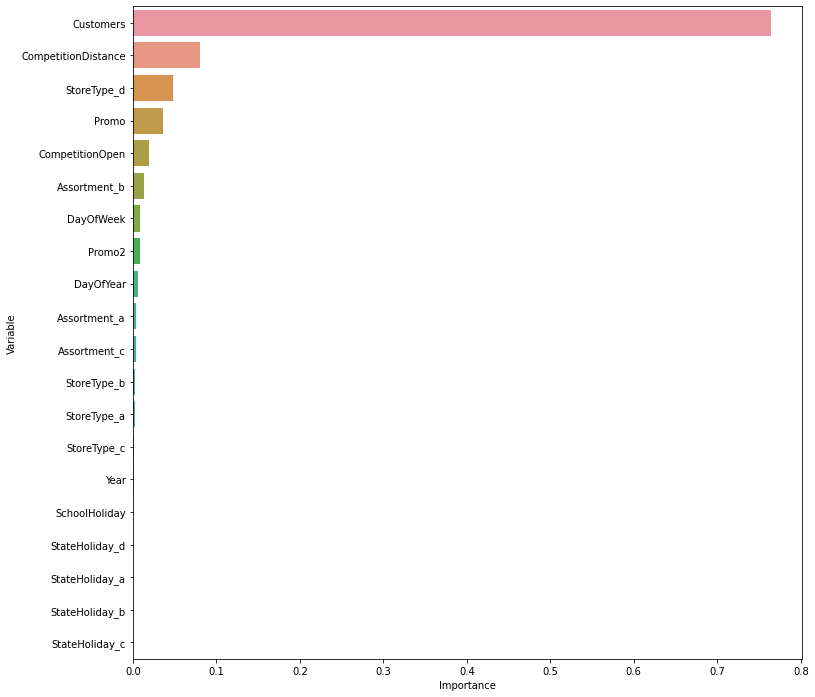

In [99]:
#visualising feature importance
fig, ax = plt.subplots(figsize=(12,12))
feature_imp = pd.DataFrame({"Variable": X_test.columns,"Importance": random_dt.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])

## ***8.*** ***Future Work***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [100]:
# Save the File
import pickle

filename = '/content/drive/MyDrive/Almabetter/Capstone Projects/Capstone 2/retail sales prediction/final_model'
pickle.dump(dt_random,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [101]:
# Reload the File and predict unseen data.
reloded_model = pickle.load(open(filename,'rb'))

In [102]:
#predictions 
y_pred_test = reloded_model.predict(X_test)
six_weeks_sales_df = y_test.copy()
six_weeks_sales_df['Pred_Sales'] = y_pred_test.tolist()

In [103]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#fitting to the original data
cleaned_unscaled_data= pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone Projects/Capstone 2/retail sales prediction/cleaned_data.csv")
#fitting numerical columns
numerical_cols = ['Sales']
scaler = MinMaxScaler()
scaler.fit(cleaned_unscaled_data[numerical_cols])

MinMaxScaler()

In [104]:
#inverse
six_weeks_sales_df[['Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Sales']])
six_weeks_sales_df[['Pred_Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Pred_Sales']])


In [105]:
#sales vs predictions
six_weeks_sales_df.sample(10)

Sales     Pred_Sales
Date       Store                              
2015-07-29 680    361425.032836  369188.242918
2015-07-10 794    338660.092196  338098.528118
2015-07-25 820    386363.402136  381375.837521
2015-06-22 869    351819.058974  351527.173219
2015-06-20 655    372295.052155  374994.211418
2015-07-03 941    361556.556312  358918.392414
2015-07-08 497    373406.234400  373893.282840
2015-07-02 99     362869.482598  361644.362006
           762    346544.369903  346424.521022
2015-07-03 634    370589.960983  373513.735501

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various Rossmann stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.Write the conclusion here.

Some important conclusions drawn from the analysis are as follows:
* there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.
* The positive effect of promotion on Customers and Sales is observable.
* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
* Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
* The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.
* Random Forest Tuned Model gave the best results and only 0.021% improvement was seen from the basic random forest model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.

**Recommendations**
* More stores should be encouraged for promotion. 
* Store type B should be increased in number.
* There's a seasonality involved, hence the stores should be encouraged to promote and take advantage of the holidays.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***